<a href="https://colab.research.google.com/github/sasa10th/battery/blob/main/%5B2025%EA%B1%B4_%EC%A0%84_%EC%A7%80_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%5D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EC%A3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 주제
* 모둠원 이름: 이홍균, 신재윤, 김지환
* 선정한 도서: 도시를 바꾸는 새
* 탐구 동기: (탐구 주제를 선정하게 된 동기나 궁금증이 생긴 이유 작성)
* 탐구 문제: (해결하고자 하는  문제 상황과 만들고자 하는 인공지능으로 확인하려는 내용)
* 관련 지속 가능 발전 목표:
* 입력 값 / 출력 값:

#1. 데이터 준비
* (데이터 소개)
* (데이터 출처)

> 데이터는 구글 드라이브 마운트를 활용하여 공유


1.   선생님이 제공한 구글 드라이브에 접속(분반별로 다름)하여 드라이브에 바로 가기 추가
 - 내 드라이브에 추가
2. 해당 드라이브에 데이터 파일 업로드
  - 데이터 파일 제목은 가급적 영문, _ 사용하여 한글, 띄어쓰기 없도록
3.   아래 코드 셀의 코드 중 업로드 한 파일의 경로를 바탕으로 구글 드라이브에서 불러오도록 함



In [1]:
##구글 드라이브 마운트를 위해 아래 두 개 셀을 차례로 실행할 것
#해당 셀 실행 -> 연결 -> 계정 선택 -> 계속(전부 체크) -> 계속 확인
from google.colab import drive
drive.mount('/gdrive')

#하단에 "Mounted at /gdrive"가 출력되면 마운트 성공!

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import pandas as pd
class_path = '/gdrive/Shareddrives/25-2_AI_data/3/battery/'

## 1. 조류 데이터 불러오기

In [3]:
df_temp = pd.read_csv(class_path+"output.csv", dtype=str)

In [4]:
df_temp = df_temp.dropna(axis=1, how="all")
df_temp = df_temp.dropna(axis=0, how="all")

In [5]:
df_temp.info()
print(df_temp.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23295 entries, 0 to 23294
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   gbifID                  23295 non-null  object
 1   datasetKey              23295 non-null  object
 2   occurrenceID            23295 non-null  object
 3   kingdom                 23295 non-null  object
 4   phylum                  22590 non-null  object
 5   class                   16360 non-null  object
 6   order                   21870 non-null  object
 7   family                  22590 non-null  object
 8   genus                   22550 non-null  object
 9   species                 22401 non-null  object
 10  infraspecificEpithet    730 non-null    object
 11  taxonRank               23295 non-null  object
 12  scientificName          23295 non-null  object
 13  verbatimScientificName  23295 non-null  object
 14  countryCode             23295 non-null  object
 15  oc

In [6]:
target_columns = [
    'species',
    'decimalLatitude',
    'decimalLongitude',
    'eventDate',
    'year',
    'month',
    'countryCode'
]

df_bird = df_temp[target_columns].copy()

print(df_bird.head())

                 species decimalLatitude decimalLongitude   eventDate  year  \
0      Dendrocopos major       37.687355       127.759039  2004-05-07  2004   
1  Dendronanthus indicus       37.066059       127.356516  2004-03-02  2004   
2        Cuculus canorus       35.401287       128.417157  2004-06-10  2004   
3             Otus sunia       36.601851       127.069433  2004-04-03  2004   
4        Cuculus canorus       35.604606       129.315823  2004-04-01  2004   

  month countryCode  
0     5          KR  
1     3          KR  
2     6          KR  
3     4          KR  
4     4          KR  


In [7]:
df_bird['decimalLatitude'] = df_bird['decimalLatitude'].astype(float).round(1)
df_bird['decimalLongitude'] = df_bird['decimalLongitude'].astype(float).round(1)

print("df_bird after rounding latitude and longitude:")
print(df_bird.head())

df_bird after rounding latitude and longitude:
                 species  decimalLatitude  decimalLongitude   eventDate  year  \
0      Dendrocopos major             37.7             127.8  2004-05-07  2004   
1  Dendronanthus indicus             37.1             127.4  2004-03-02  2004   
2        Cuculus canorus             35.4             128.4  2004-06-10  2004   
3             Otus sunia             36.6             127.1  2004-04-03  2004   
4        Cuculus canorus             35.6             129.3  2004-04-01  2004   

  month countryCode  
0     5          KR  
1     3          KR  
2     6          KR  
3     4          KR  
4     4          KR  


In [8]:
unique_species = df_bird['species'].unique()
print("df_bird의 모든 고유한 종:")
for species in unique_species:
    print(species)

df_bird의 모든 고유한 종:
Dendrocopos major
Dendronanthus indicus
Cuculus canorus
Otus sunia
Ninox scutulata
Egretta garzetta
Halcyon pileata
Oriolus chinensis
Cuculus saturatus
Caprimulgus indicus
Cuculus micropterus
Alcedo atthis
Aix galericulata
Picus canus
Eurystomus orientalis
Cinclus pallasii
Loxia curvirostra
Ardea alba
Dendrocopos leucotos
Cyanopica cyanus
Lanius cristatus
Saxicola torquatus
Cuculus hyperythrus
Tetrastes bonasia
Halcyon coromanda
Ficedula zanthopygia
Cisticola juncidis
Cuculus poliocephalus
Apus pacificus
Synthliboramphus antiquus
Otus bakkamoena
Sternula albifrons
Emberiza cioides
Falco columbarius
Hypsipetes amaurotis
Corvus macrorhynchos
Upupa epops
Eophona migratoria
Spatula querquedula
Bombycilla japonica
Anas platyrhynchos
Pericrocotus divaricatus
Anas poecilorhyncha
Sibirionetta formosa
Motacilla cinerea
Hirundo rustica
Motacilla alba
Pica pica
Yungipicus kizuki
Parus major
Parus varius
nan
Lanius bucephalus
Yungipicus canicapillus
Hirundapus caudacutus
Phoenic

In [9]:
non_bird_species = [
    'Pseudogobio esocinus', 'Odontobutis platycephala', 'Misgurnus mizolepis', 'Squalidus gracilis',
    'Coreoperca herzi', 'Rhynchocypris oxycephalus', 'Pungtungia herzi', 'Rhodeus ocellatus',
    'Microphysogobio yaluensis', 'Zacco platypus', 'Sarcocheilichthys variegatus', 'Hypomesus nipponensis',
    'Misgurnus anguillicaudatus', 'Pseudorasbora parva', 'Squalidus japonicus', 'Opsariichthys uncirostris',
    'Liobagrus mediadiposalis', 'Acanthogobius lactipes', 'Liobagrus andersoni', 'Macropodus ocellatus',
    'Rhodeus uyekii', 'Tachysurus fulvidraco', 'Oryzias sinensis', 'Pseudobagrus koreanus',
    'Plecoglossus altivelis', 'Rhodeus notatus', 'Lepomis macrochirus', 'Phoxinus kumgangensis',
    'Lefua costata', 'Micropterus salmoides', 'Silurus asotus', 'Oryzias latipes',
    'Microphysogobio longidorsalis', 'Siniperca scherzeri', 'Pungitius sinensis', 'Silurus microdorsalis',
    'Planiliza haematocheila', 'Monopterus albus', 'Anguilla japonica', 'Tribolodon hakonensis',
    'Rhynchocypris steindachneri', 'Channa argus', 'Cobitis pacifica', 'Zebrias fasciatus',
    'Barbatula nuda', 'Nipponocypris koreanus', 'Squalidus multimaculatus', 'Lateolabrax japonicus',
    'Repomucenus ornatipinnis', 'Pleuronichthys cornutus', 'Sarcocheilichthys nigripinnis',
    'Hemitripterus villosus', 'Takifugu niphobles', 'Mugil cephalus', 'Stephanolepis cirrhifer',
    'Acanthogobius flavimanus', 'Gasterosteus aculeatus', 'Squaliobarbus curriculus', 'Oncorhynchus keta',
    'Pelteobagrus ussuriensis', 'Tachysurus nitidus', 'Boleophthalmus pectinirostris', 'Oncorhynchus masou',
    'Hyporhamphus sajori', 'Odontobutis interrupta', 'Liobagrus somjinensis', 'Oncorhynchus mykiss',
    'Micropercops swinhonis', 'Scincella vandenburghi', 'Takydromus amurensis', 'Elaphe dione',
    'Rhabdophis tigrinus', 'Oocatochus rufodorsatus', 'Gloydius intermedius', 'Lycodon rufozonatus',
    'Orientocoluber spinalis', 'Takydromus wolteri', 'Gloydius ussuriensis', 'Rana dybowskii',
    'Bufo gargarizans', 'Hynobius leechii', 'Bombina orientalis', 'Pelophylax nigromaculatus',
    'Dryophytes japonicus', 'Lithobates catesbeianus', 'Glandirana rugosa', 'Trachemys scripta',
    'Hebius vibakari', 'Bufo stejnegeri', 'Pholis nebulosa', 'Rana huanrenensis',
    'Onychodactylus koreanus', 'Rana coreana', 'Sphyraena pinguis', 'Takifugu obscurus',
    'Acentrogobius pflaumii', 'Scincella huanrenensis', 'Hynobius quelpaertensis',
    'Gallerucida bifasciata', 'Chrysomela populi', 'Polistes snelleni', 'Poecilocoris lewisi',
    'Amegilla florea', 'Orthocephalus funestus', 'Rhopalus maculatus', 'Atractomorpha lata',
    'Ruspolia lineosa', 'Phaneroptera falcata', 'Polistes mandarinus', 'Conocephalus exemptus',
    'Polionemobius flavoantennalis', 'Oedaleus infernalis', 'Conocephalus japonicus',
    'Galerucella grisescens', 'Chrysolina aurichalcea', 'Oecanthus longicauda', 'Ischnura asiatica',
    'Eurydema gebleri', 'Carbula putoni', 'Tenodera angustipennis', 'Teleogryllus emma',
    'Shirakiacris shirakii', 'Leptura aethiops', 'Rhopalus sapporensis', 'Menida violacea',
    'Leiopus stillatus', 'Loxoblemmus arietulus', 'Paratlanticus ussuriensis', 'Tetrix japonica',
    'Ectmetopterus micantulus', 'Gastrophysa atrocyanea', 'Eysarcoris guttigerus',
    'Eurydema dominulus', 'Stethophyma magister', 'Pachygrontha antennata', 'Chlaenius virgulifer',
    'Plautia stali', 'Lema decempunctata', 'Nepa hoffmanni', 'Apolygus spinolae',
    'Menida musiva', 'Himacerus apterus', 'Thyris fenestrella', 'Calleida lepida',
    'Trilophidia annulata', 'Agrypnus binodulus', 'Phaneroptera nigroantennata', 'Phytocoris intricatus',
    'Velarifictorus aspersus', 'Charagochilus angusticollis', 'Deraeocoris punctulatus',
    'Acrida cinerea', 'Ruspolia dubia', 'Ludioschema vittiger', 'Crepidodera plutus',
    'Ectropis crepuscularia', 'Stictoleptura rubra', 'Mongolotettix japonicus', 'Geocoris varius',
    'Statilia maculata', 'Polionemobius taprobanense', 'Chizuella bonneti', 'Liorhyssus hyalinus',
    'Hexacentrus japonicus', 'Geocoris itonis', 'Amara ussuriensis', 'Dolycoris baccarum',
    'Calopteryx japonica', 'Anax parthenope', 'Ranatra unicolor', 'Dalpada cinctipes',
    'Tenodera sinensis', 'Eysarcoris aeneus', 'Pectocera fortunei', 'Gampsocleis ussuriensis',
    'Gryllotalpa orientalis', 'Agrypnus argillaceus', 'Ognevia sergii', 'Confusacris longipennis',
    'Eurygaster testudinaria', 'Ceutorhynchus filiae', 'Tytthus chinensis', 'Gastrolina depressa',
    'Pinthaeus sanguinipes', 'Aphrophora straminea', 'Necrodes littoralis', 'Lema fortunei',
    'Aquarius paludum', 'Myzia oblongoguttata', 'Ostrinia palustralis', 'Anastrangalia scotodes',
    'Fleutiauxia armata', 'Dianemobius fascipes', 'Halyomorpha halys', 'Libelloides sibiricus',
    'Velarifictorus micado', 'Anapodisma miramae', 'Atrocalopteryx atrata', 'Criotettix japonicus',
    'Xya japonica', 'Gastrimargus marmoratus', 'Locusta migratoria', 'Lema diversa',
    'Apolygus limbatus', 'Idaea biselata', 'Stictopleurus crassicornis', 'Plutella xylostella',
    'Dactylispa angulosa', 'Homalogonia obtusa', 'Capsus pilifer', 'Physopelta cincticollis',
    'Pseudoips prasinana', 'Cymus koreanus', 'Odonestis pruni', 'Nupserha marginella',
    'Nezara antennata', 'Anapodisma beybienkoi', 'Lygus rugulipennis', 'Eucera nipponensis',
    'Massicus raddei', 'Ancylopus pictus', 'Ypthima motschulskyi', 'Hispellinus moerens',
    'Melanotus cete', 'Deraeocoris ulmi', 'Ranatra chinensis', 'Amarysius altajensis',
    'Iodinus ferrugineus', 'Neolethaeus dallasi', 'Chrysochus chinensis', 'Stictopleurus minutus',
    'Ducetia japonica', 'Chlaenius pallipes', 'Chaenogobius annularis', 'Aleiodes dimidiatus',
    'Hemipyxis plagioderoides', 'Anthinobaris dispilota', 'Chrysomela vigintipunctata',
    'Chlorophorus diadema', 'Megachile japonica', 'Eumenes rubronotatus', 'Eumecocera impustulata',
    'Chlamisus pubiceps', 'Sinochlora longifissa', 'Phraortes elongatus', 'Idaea muricata',
    'Gampsocleis sedakovii', 'Nabis apicalis', 'Scopula internata', 'Eysarcoris ventralis',
    'Peridea gigantea', 'Monalocoris filicis', 'Arcyptera coreana', 'Trigonotylus caelestialium',
    'Ectmetopterus comitans', 'Sphinx morio', 'Phelotrupes auratus', 'Ochterus marginatus',
    'Eurystylus coelestialium', 'Distenia japonica', 'Colasposoma dauricum', 'Deraeocoris ater',
    'Amyna crocosticta', 'Perynea subrosea', 'Elimaea fallax', 'Chlaenius variicornis',
    'Creontiades coloripes', 'Orthotylus flavosparsus', 'Piezodorus hybneri', 'Chrysolina virgata',
    'Arhopalus rusticus', 'Apolygus lucorum', 'Anisogomphus maacki', 'Conocephalus chinensis',
    'Scotinophara lurida', 'Prumna tristis', 'Adimonia daurica', 'Eysarcoris annamita',
    'Blattella nipponica', 'Suisha coreana', 'Capsodes gothicus', 'Galeruca dahlii',
    'Cyrtorhinus caricis', 'Ixia populi', 'Loristes decoratus', 'Ourapteryx koreana',
    'Tetrigus lewisi', 'Ceriagrion auranticum', 'Lilioceris sieversi', 'Dere thoracica',
    'Eurystylus luteus', 'Ninomimus flavipes', 'Eudocima tyrannus', 'Episcapha fortunii',
    'Ampedus puniceus', 'Dactylispa subquadrata', 'Chlaenius micans', 'Arma custos',
    'Geocoris pallidipennis', 'Bothynotus pilosus', 'Orthops scutellatus', 'Orthetrum lineostigma',
    'Acherontia styx', 'Furcula furcula', 'Cyrtoclytus capra', 'Chlaenius naeviger',
    'Chlorophorus latofasciatus', 'Chlaenius posticalis', 'Idaea impexa', 'Epicauta chinensis',
    'Aulacocheilus luniferus', 'Enaptorhinus granulatus', 'Arge pagana', 'Anoplophora chinensis',
    'Calvia decemguttata', 'Loxoblemmus formosanus', 'Acanthogobius luridus', 'Nippancistroger testaceus',
    'Arcyptera albogeniculata', 'Phaeochrous emarginatus', 'Galerucella nipponensis',
    'Lelia decempunctata', 'Amara congrua', 'Dybowskyia reticulata', 'Melanotus legatus',
    'Clytus nigritulus', 'Idaea effusaria', 'Nesidiocoris tenuis', 'Bembidion semilunium',
    'Eumeta minuscula', 'Bembidion lissonotum', 'Anastrangalia sequensi', 'Calleida onoha',
    'Drasterius agnatus', 'Anisodactylus punctatipennis', 'Apolygus hilaris', 'Gonista bicolor',
    'Cyrtopeltis rufobrunnea', 'Rhabdoclytus acutivittis', 'Ceriagrion nipponicum', 'Picromerus lewisi',
    'Clostera albosigma', 'Epiglenea comes', 'Conocephalus maculatus', 'Formosatettix robustus',
    'Ostrinia zealis', 'Arocatus sericans', 'Blattella germanica', 'Pseudocopera rubripes',
    'Ischnura senegalensis', 'Stephanitis pyrioides', 'Dimorphopterus pallipes', 'Halticus insularis',
    'Rhynchaenus pacificus', 'Sympetrum risi', 'Cysteochila vota', 'Pyrausta unipunctata',
    'Dinoptera minuta', 'Polydrusus obesulus', 'Actenicerus pruinosus', 'Bembidion scopulinum',
    'Hierodula patellifera', 'Crematogaster brunnea', 'Epiclytus ussuricus', 'Lema guadelupensis',
    'Idaea trisetata', 'Trigonocolus tibialis', 'Apolygus nigrovirens', 'Periplaneta japonica',
    'Gastropacha populifolia', 'Eobiana engelhardti', 'Idaea nitidata', 'Rubiconia intermedia',
    'Lygaeus equestris', 'Euparatettix insularis', 'Gaurotes virginea', 'Bembidion niloticum',
    'Pyrausta panopealis', 'Epitheca marginata', 'Scudderocoris albomarginatus', 'Metialma signifera',
    'Loxoblemmus doenitzi', 'Dermestes vorax', 'Tettigonia ussuriana', 'Ornebius kanetataki',
    'Ceuthorrhynchidius hypocritus', 'Calliptamus abbreviatus', 'Chloridolum viride', 'Idaea auricruda',
    'Gonioctena fulva', 'Stenelmis nipponica', 'Idaea denudaria', 'Chlaenius inops',
    'Loxoblemmus equestris', 'Amara macronota', 'Notonecta triguttata', 'Pentatoma rufipes',
    'Eysarcoris gibbosus', 'Stictoleptura variicornis', 'Longitarsus holsaticus', 'Ceuthorrhynchus sulcithorax',
    'Bembidion varium', 'Lema concinnipennis', 'Ceresium longicorne', 'Cyrtonota honorata',
    'Exocentrus fisheri', 'Smicronyx rubricatus', 'Selatosomus puncticollis', 'Ceriagrion melanurum',
    'Cryptocephalus regalis', 'Pseudohedya gradana', 'Prosternon aurichalceum', 'Chrysobothris samurai',
    'Eremocoris plebejus', 'Anisodactylus signatus', 'Nothomyllocerus illitus', 'Cryptocephalus parvulus',
    'Melanotus cribricollis', 'Coenagrion lanceolatum', 'Nothomyllocerus griseus',
    'Bembidion coreanum', 'Glaucias subpunctatus', 'Exocentrus guttulatus', 'Eutetrapha sedecimpunctata',
    'Maiestas dorsalis', 'Caloptilia chrysolampra', 'Macromia amphigena', 'Paracercion calamorum',
    'Choroterpes altioculus', 'Drunella aculea', 'Ecdyonurus kibunensis', 'Chaetogaster limnaei',
    'Cheumatopsyche brevilineata', 'Eupithecia insigniata', 'Nigrobaetis bacillus', 'Limnodrilus gotoi',
    'Dugesia japonica', 'Ecdyonurus levis', 'Physella acuta', 'Cincticostella orientalis',
    'Gyraulus chinensis', 'Baetiella tuberculata', 'Corbicula fluminea', 'Semisulcospira libertina',
    'Gordius aquaticus', 'Teloganopsis punctisetae', 'Arctopsyche ladogensis', 'Paraleptophlebia japonica',
    'Gerris latiabdominis', 'Labiobaetis atrebatinus', 'Potamanthus formosus', 'Orthetrum albistylum',
    'Radix auricularia', 'Ephemerella atagosana', 'Hesperocorixa distanti', 'Palaemon paucidens',
    'Baetis fuscatus', 'Procloeon maritimum', 'Epeorus nipponicus', 'Acentrella sibirica',
    'Ephemera orientalis', 'Appasus japonicus', 'Nodularia douglasiae', 'Epeorus pellucidus',
    'Exocentrus lineatus', 'Rhopalus latus', 'Graptostethus servus', 'Cryptalaus berus',
    'Bembidion stenoderum', 'Ephemera strigata', 'Phagocata vivida', 'Davidius lunatus',
    'Cloeon dipterum', 'Cincticostella levanidovae', 'Semisulcospira coreana', 'Rhantus suturalis',
    'Goera japonica', 'Epeorus latifolium', 'Psilotreta kisoensis', 'Chironomus plumosus',
    'Macrostemum radiatum', 'Corbicula leana', 'Protohermes grandis', 'Cipangopaludina malleata',
    'Koreoleptoxis tegulata', 'Hydatophylax nigrovittatus', 'Ameletus montanus', 'Sigara nigroventralis',
    'Glossiphonia complanata', 'Helochares nipponicus', 'Caenis nishinoae', 'Serratella setigera',
    'Parachauliodes continentalis', 'Semisulcospira forticosta', 'Rhyacophila yamanakensis',
    'Hippeutis cantori', 'Ecnomus tenellus', 'Pseudocopera annulata', 'Zubovskya koreana',
    'Physopelta gutta', 'Alboglossiphonia lata', 'Sieboldius albardae', 'Stenopsyche griseipennis',
    'Anemina arcaeformis', 'Chironomus salinarius', 'Cipangopaludina japonica', 'Rhyacophila retracta',
    'Neocaridina denticulata', 'Sigara substriata', 'Rhoenanthus coreanus', 'Rhyacophila nigrocephala',
    'Siphlonurus chankae', 'Ephemerella kozhovi', 'Bolbelasmus coreanus', 'Plagiosterna aenea',
    'Tettigonia dolichoptera', 'Blasticorhinus rivulosa', 'Gonioctena coreana', 'Craniophora pacifica',
    'Pyrausta tithonialis', 'Onthophagus lenzii', 'Macrobrachium nipponense', 'Stenopsyche bergeri'
]

df_bird = df_bird[~df_bird['species'].isin(non_bird_species)]

print("Non-bird species removed from df_bird. Remaining data:")
print(df_bird.head())
print("\nInfo of df_bird after removing non-bird species:")
print(df_bird.info())

Non-bird species removed from df_bird. Remaining data:
                 species  decimalLatitude  decimalLongitude   eventDate  year  \
0      Dendrocopos major             37.7             127.8  2004-05-07  2004   
1  Dendronanthus indicus             37.1             127.4  2004-03-02  2004   
2        Cuculus canorus             35.4             128.4  2004-06-10  2004   
3             Otus sunia             36.6             127.1  2004-04-03  2004   
4        Cuculus canorus             35.6             129.3  2004-04-01  2004   

  month countryCode  
0     5          KR  
1     3          KR  
2     6          KR  
3     4          KR  
4     4          KR  

Info of df_bird after removing non-bird species:
<class 'pandas.core.frame.DataFrame'>
Index: 11878 entries, 0 to 23294
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   species           10984 non-null  object 
 1   decimalLatitude   11878 non

In [10]:
df_bird_new = df_bird.groupby(['year', 'decimalLatitude', 'decimalLongitude']).agg(
    unique_species_count=('species', lambda x: x.nunique()),
    total_occurrences=('species', 'count')
).reset_index()

print("df_bird_new head after grouping and aggregation:")
print(df_bird_new.head())
print("\ndf_bird_new info:")
print(df_bird_new.info())

df_bird_new head after grouping and aggregation:
   year  decimalLatitude  decimalLongitude  unique_species_count  \
0  1997             34.9             128.4                     2   
1  1997             35.4             126.4                     2   
2  1997             35.4             126.7                     4   
3  1997             35.4             126.8                     2   
4  1997             35.4             127.7                     1   

   total_occurrences  
0                  2  
1                  3  
2                  7  
3                  2  
4                  1  

df_bird_new info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  2273 non-null   object 
 1   decimalLatitude       2273 non-null   float64
 2   decimalLongitude      2273 non-null   float64
 3   unique_species_coun

In [11]:
habitat_classification = {
    'Dendrocopos major': 'Forest',
    'Dendronanthus indicus': 'Forest',
    'Cuculus canorus': 'Forest',
    'Otus sunia': 'Forest',
    'Ninox scutulata': 'Forest',
    'Egretta garzetta': 'Wetland/Water',
    'Halcyon pileata': 'Wetland/Water',
    'Oriolus chinensis': 'Forest',
    'Cuculus saturatus': 'Forest',
    'Caprimulgus indicus': 'Forest',
    'Cuculus micropterus': 'Forest',
    'Alcedo atthis': 'Wetland/Water',
    'Aix galericulata': 'Wetland/Water',
    'Picus canus': 'Forest',
    'Eurystomus orientalis': 'Forest',
    'Cinclus pallasii': 'Wetland/Water',
    'Loxia curvirostra': 'Forest',
    'Ardea alba': 'Wetland/Water',
    'Dendrocopos leucotos': 'Forest',
    'Cyanopica cyanus': 'Urban',
    'Lanius cristatus': 'Open Land',
    'Saxicola torquatus': 'Open Land',
    'Cuculus hyperythrus': 'Forest',
    'Tetrastes bonasia': 'Forest',
    'Halcyon coromanda': 'Forest',
    'Ficedula zanthopygia': 'Forest',
    'Cisticola juncidis': 'Open Land',
    'Cuculus poliocephalus': 'Forest',
    'Apus pacificus': 'Urban',
    'Synthliboramphus antiquus': 'Wetland/Water',
    'Otus bakkamoena': 'Forest',
    'Sternula albifrons': 'Wetland/Water',
    'Emberiza cioides': 'Open Land',
    'Falco columbarius': 'Predator/Generalist',
    'Hypsipetes amaurotis': 'Forest',
    'Corvus macrorhynchos': 'Urban',
    'Upupa epops': 'Open Land',
    'Eophona migratoria': 'Forest',
    'Spatula querquedula': 'Wetland/Water',
    'Bombycilla japonica': 'Forest',
    'Anas platyrhynchos': 'Wetland/Water',
    'Pericrocotus divaricatus': 'Forest',
    'Anas poecilorhyncha': 'Wetland/Water',
    'Sibirionetta formosa': 'Wetland/Water',
    'Motacilla cinerea': 'Wetland/Water',
    'Hirundo rustica': 'Urban',
    'Motacilla alba': 'Urban',
    'Pica pica': 'Urban',
    'Yungipicus kizuki': 'Forest',
    'Parus major': 'Forest',
    'Parus varius': 'Forest',
    'Lanius bucephalus': 'Open Land',
    'Yungipicus canicapillus': 'Forest',
    'Hirundapus caudacutus': 'Forest',
    'Phoenicurus auroreus': 'Urban',
    'Corvus corone': 'Urban',
    'Aegithalos caudatus': 'Forest',
    'Garrulus glandarius': 'Forest',
    'Anser albifrons': 'Wetland/Water',
    'Poecile palustris': 'Forest',
    'Emberiza rustica': 'Open Land',
    'Passer montanus': 'Urban',
    'Periparus ater': 'Forest',
    'Phasianus colchicus': 'Open Land',
    'Aythya valisineria': 'Wetland/Water',
    'Anthus hodgsoni': 'Open Land',
    'Emberiza elegans': 'Open Land',
    'Coccothraustes coccothraustes': 'Forest',
    'Tarsiger cyanurus': 'Forest',
    'Motacilla grandis': 'Wetland/Water',
    'Apus nipalensis': 'Urban',
    'Emberiza tristrami': 'Open Land',
    'Cecropis daurica': 'Urban',
    'Anas crecca': 'Wetland/Water',
    'Chloris sinica': 'Open Land',
    'Spinus spinus': 'Forest',
    'Horornis diphone': 'Forest',
    'Carpodacus sibiricus': 'Open Land',
    'Columba livia': 'Urban',
    'Cyanoptila cyanomelana': 'Forest',
    'Anthus rubescens': 'Open Land',
    'Emberiza pallasi': 'Open Land',
    'Pyrrhula pyrrhula': 'Forest',
    'Emberiza chrysophrys': 'Open Land',
    'Themeda triandra': 'Open Land', # Assuming this is a plant, classifying as open land for now
    'Motacilla flava': 'Wetland/Water',
    'Fringilla montifringilla': 'Forest',
    'Mareca penelope': 'Wetland/Water',
    'Mareca strepera': 'Wetland/Water',
    'Mareca falcata': 'Wetland/Water',
    'Larus argentatus': 'Wetland/Water',
    'Emberiza spodocephala': 'Open Land',
    'Aythya ferina': 'Wetland/Water',
    'Tadorna tadorna': 'Wetland/Water',
    'Muscicapa latirostris': 'Forest',
    'Monticola solitarius': 'Open Land',
    'Coloeus dauuricus': 'Urban',
    'Lanius tigrinus': 'Open Land',
    'Alauda arvensis': 'Open Land',
    'Emberiza rutila': 'Open Land',
    'Regulus regulus': 'Forest',
    'Emberiza fucata': 'Open Land',
    'Emberiza pusilla': 'Open Land',
    'Asio otus': 'Forest',
    'Eophona personata': 'Forest',
    'Lanius sphenocercus': 'Open Land',
    'Spatula clypeata': 'Wetland/Water',
    'Ficedula narcissina': 'Forest',
    'Tadorna ferruginea': 'Wetland/Water',
    'Prunella montanella': 'Open Land',
    'Carpodacus roseus': 'Open Land'
}

def classify_habitat(species_name):
    """
    Classifies a bird species into a habitat category.
    Returns 'Other' if species is NaN or not found in the habitat_classification dictionary.
    """
    if pd.isna(species_name):
        return 'Other'
    return habitat_classification.get(species_name, 'Other')

print("Habitat classification dictionary and function 'classify_habitat' defined.")

Habitat classification dictionary and function 'classify_habitat' defined.


In [12]:
df_bird['habitat_category'] = df_bird['species'].apply(classify_habitat)

print("df_bird with new 'habitat_category' column:")
print(df_bird.head())
print("\nValue counts for habitat categories:")
print(df_bird['habitat_category'].value_counts())

df_bird with new 'habitat_category' column:
                 species  decimalLatitude  decimalLongitude   eventDate  year  \
0      Dendrocopos major             37.7             127.8  2004-05-07  2004   
1  Dendronanthus indicus             37.1             127.4  2004-03-02  2004   
2        Cuculus canorus             35.4             128.4  2004-06-10  2004   
3             Otus sunia             36.6             127.1  2004-04-03  2004   
4        Cuculus canorus             35.6             129.3  2004-04-01  2004   

  month countryCode habitat_category  
0     5          KR           Forest  
1     3          KR           Forest  
2     6          KR           Forest  
3     4          KR           Forest  
4     4          KR           Forest  

Value counts for habitat categories:
habitat_category
Forest                 6741
Wetland/Water          1846
Urban                  1410
Open Land               983
Other                   894
Predator/Generalist       4
Name: count,

In [13]:
df_habitat_aggregated = df_bird.groupby(['year', 'decimalLatitude', 'decimalLongitude', 'habitat_category']).agg(
    unique_species_in_habitat=('species', 'nunique'),
    total_occurrences_in_habitat=('species', 'count')
).reset_index()

print("df_habitat_aggregated head after grouping and aggregation:")
print(df_habitat_aggregated.head())
print("\ndf_habitat_aggregated info:")
print(df_habitat_aggregated.info())

df_habitat_aggregated head after grouping and aggregation:
   year  decimalLatitude  decimalLongitude habitat_category  \
0  1997             34.9             128.4           Forest   
1  1997             35.4             126.4    Wetland/Water   
2  1997             35.4             126.7           Forest   
3  1997             35.4             126.7            Urban   
4  1997             35.4             126.7    Wetland/Water   

   unique_species_in_habitat  total_occurrences_in_habitat  
0                          2                             2  
1                          2                             3  
2                          1                             2  
3                          1                             1  
4                          2                             4  

df_habitat_aggregated info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3519 entries, 0 to 3518
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
--

In [14]:
passer_montanus_counts = df_bird[df_bird['species'] == 'Passer montanus'].groupby(
    ['year', 'decimalLatitude', 'decimalLongitude']
).size().reset_index(name='passer_montanus_count')

# Ensure 'year' in passer_montanus_counts is of the same type as in df_bird_new
passer_montanus_counts['year'] = passer_montanus_counts['year'].astype(df_bird_new['year'].dtype)

print("Passer montanus counts head:")
print(passer_montanus_counts.head())
print("\nPasser montanus counts info:")
print(passer_montanus_counts.info())

Passer montanus counts head:
   year  decimalLatitude  decimalLongitude  passer_montanus_count
0  2006             35.5             127.7                      1
1  2006             35.7             127.6                      1
2  2006             36.8             128.1                      2
3  2006             36.8             128.2                      3
4  2006             36.9             127.8                      1

Passer montanus counts info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   39 non-null     object 
 1   decimalLatitude        39 non-null     float64
 2   decimalLongitude       39 non-null     float64
 3   passer_montanus_count  39 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 1.3+ KB
None


In [15]:
df_bird_new = pd.merge(df_bird_new, passer_montanus_counts, on=['year', 'decimalLatitude', 'decimalLongitude'], how='left').fillna(0)

print("df_bird_new head after merging passer_montanus_counts:")
print(df_bird_new.head())
print("\ndf_bird_new info after merging passer_montanus_counts:")
print(df_bird_new.info())

df_bird_new head after merging passer_montanus_counts:
   year  decimalLatitude  decimalLongitude  unique_species_count  \
0  1997             34.9             128.4                     2   
1  1997             35.4             126.4                     2   
2  1997             35.4             126.7                     4   
3  1997             35.4             126.8                     2   
4  1997             35.4             127.7                     1   

   total_occurrences  passer_montanus_count  
0                  2                    0.0  
1                  3                    0.0  
2                  7                    0.0  
3                  2                    0.0  
4                  1                    0.0  

df_bird_new info after merging passer_montanus_counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  --

In [16]:
df_habitat_pivot_unique = df_habitat_aggregated.pivot_table(
    index=['year', 'decimalLatitude', 'decimalLongitude'],
    columns='habitat_category',
    values='unique_species_in_habitat',
    fill_value=0
).add_prefix('unique_species_').reset_index()

df_habitat_pivot_occurrences = df_habitat_aggregated.pivot_table(
    index=['year', 'decimalLatitude', 'decimalLongitude'],
    columns='habitat_category',
    values='total_occurrences_in_habitat',
    fill_value=0
).add_prefix('occurrences_').reset_index()

# Merge the two pivoted dataframes
df_habitat_pivoted = pd.merge(
    df_habitat_pivot_unique,
    df_habitat_pivot_occurrences,
    on=['year', 'decimalLatitude', 'decimalLongitude'],
    how='outer'
)

# Ensure 'year' in df_habitat_pivoted is of the same type as in df_bird_new
df_habitat_pivoted['year'] = df_habitat_pivoted['year'].astype(df_bird_new['year'].dtype)

print("df_habitat_pivoted head:")
print(df_habitat_pivoted.head())
print("\ndf_habitat_pivoted info:")
print(df_habitat_pivoted.info())

df_habitat_pivoted head:
habitat_category  year  decimalLatitude  decimalLongitude  \
0                 1997             34.9             128.4   
1                 1997             35.4             126.4   
2                 1997             35.4             126.7   
3                 1997             35.4             126.8   
4                 1997             35.4             127.7   

habitat_category  unique_species_Forest  unique_species_Open Land  \
0                                   2.0                       0.0   
1                                   0.0                       0.0   
2                                   1.0                       0.0   
3                                   2.0                       0.0   
4                                   0.0                       0.0   

habitat_category  unique_species_Other  unique_species_Predator/Generalist  \
0                                  0.0                                 0.0   
1                                  0.

In [17]:
df_bird_new = pd.merge(
    df_bird_new,
    df_habitat_pivoted,
    on=['year', 'decimalLatitude', 'decimalLongitude'],
    how='left'
)

# Fill NaN values that resulted from the merge with 0, as they indicate no occurrences/species in that habitat
# It's important to do this after the merge, so we don't accidentally fill original data if it was NaN
df_bird_new = df_bird_new.fillna(0)

print("df_bird_new head after merging habitat-pivoted data:")
print(df_bird_new.head())
print("\ndf_bird_new info after merging habitat-pivoted data:")
print(df_bird_new.info())

df_bird_new head after merging habitat-pivoted data:
   year  decimalLatitude  decimalLongitude  unique_species_count  \
0  1997             34.9             128.4                     2   
1  1997             35.4             126.4                     2   
2  1997             35.4             126.7                     4   
3  1997             35.4             126.8                     2   
4  1997             35.4             127.7                     1   

   total_occurrences  passer_montanus_count  unique_species_Forest  \
0                  2                    0.0                    2.0   
1                  3                    0.0                    0.0   
2                  7                    0.0                    1.0   
3                  2                    0.0                    2.0   
4                  1                    0.0                    0.0   

   unique_species_Open Land  unique_species_Other  \
0                       0.0                   0.0   
1          

In [18]:
df_bird_new = df_bird_new.rename(columns={'decimalLatitude': 'latitude', 'decimalLongitude': 'longitude'})

print("df_bird_new after renaming coordinate columns:")
print(df_bird_new.head())
print("\ndf_bird_new info after renaming coordinate columns:")
print(df_bird_new.info())

df_bird_new after renaming coordinate columns:
   year  latitude  longitude  unique_species_count  total_occurrences  \
0  1997      34.9      128.4                     2                  2   
1  1997      35.4      126.4                     2                  3   
2  1997      35.4      126.7                     4                  7   
3  1997      35.4      126.8                     2                  2   
4  1997      35.4      127.7                     1                  1   

   passer_montanus_count  unique_species_Forest  unique_species_Open Land  \
0                    0.0                    2.0                       0.0   
1                    0.0                    0.0                       0.0   
2                    0.0                    1.0                       0.0   
3                    0.0                    2.0                       0.0   
4                    0.0                    0.0                       0.0   

   unique_species_Other  unique_species_Predator/Ge

## ?. 환경 데이터 불러오기(AirKorea)

In [ ]:
# import os
# import re
# import pandas as pd
# import unicodedata # Import unicodedata for normalization
# from tqdm import tqdm # Import tqdm for progress bar

# # Ensure class_path is defined from previous cells
# # class_path = '/gdrive/Shareddrives/25-2_AI_data/3/battery/'

# all_dataframes_list = [] # Will be populated with all loaded DataFrames

# # Regex patterns for different naming conventions
# pattern_2001_2013 = re.compile(r'(\d{4})년(\d{2})분기\.xlsx') # e.g., 2013년04분기.xlsx
# pattern_2014_2016 = re.compile(r'(\d{4})년 (\d)분기\.xlsx')   # e.g., 2014년 1분기.xlsx
# pattern_2017_2018 = re.compile(r'(\d{4})년 (\d{1,2})월\.xlsx')    # e.g., 2017년 07월.xlsx or 2018년 7월.xlsx

# file_info = []

# for filename in os.listdir(class_path):
#     normalized_filename = unicodedata.normalize('NFC', filename)

#     if normalized_filename.endswith('.xlsx'):
#         match_2001_2013 = pattern_2001_2013.match(normalized_filename)
#         match_2014_2016 = pattern_2014_2016.match(normalized_filename)
#         match_2017_2018 = pattern_2017_2018.match(normalized_filename)

#         year = None
#         period_type = None
#         period_value = None

#         if match_2001_2013:
#             year = int(match_2001_2013.group(1))
#             period_type = 'quarter'
#             period_value = int(match_2001_2013.group(2))
#         elif match_2014_2016:
#             year = int(match_2014_2016.group(1))
#             period_type = 'quarter'
#             period_value = int(match_2014_2016.group(2))
#         elif match_2017_2018:
#             year = int(match_2017_2018.group(1))
#             period_type = 'month'
#             period_value = int(match_2017_2018.group(2))
#         else:
#             continue

#         if year:
#             file_info.append({
#                 'year': year,
#                 'period_type': period_type,
#                 'period_value': period_value,
#                 'filename': normalized_filename
#             })

# file_info.sort(key=lambda x: (x['year'], x['period_value']))

# file_info

[{'year': 2001,
  'period_type': 'quarter',
  'period_value': 1,
  'filename': '2001년01분기.xlsx'},
 {'year': 2001,
  'period_type': 'quarter',
  'period_value': 2,
  'filename': '2001년02분기.xlsx'},
 {'year': 2001,
  'period_type': 'quarter',
  'period_value': 3,
  'filename': '2001년03분기.xlsx'},
 {'year': 2001,
  'period_type': 'quarter',
  'period_value': 4,
  'filename': '2001년04분기.xlsx'},
 {'year': 2002,
  'period_type': 'quarter',
  'period_value': 1,
  'filename': '2002년01분기.xlsx'},
 {'year': 2002,
  'period_type': 'quarter',
  'period_value': 2,
  'filename': '2002년02분기.xlsx'},
 {'year': 2002,
  'period_type': 'quarter',
  'period_value': 3,
  'filename': '2002년03분기.xlsx'},
 {'year': 2002,
  'period_type': 'quarter',
  'period_value': 4,
  'filename': '2002년04분기.xlsx'},
 {'year': 2003,
  'period_type': 'quarter',
  'period_value': 1,
  'filename': '2003년01분기.xlsx'},
 {'year': 2003,
  'period_type': 'quarter',
  'period_value': 2,
  'filename': '2003년02분기.xlsx'},
 {'year': 2003,
  'p

In [ ]:
# import pandas as pd
# import os

# # 1. Define a list of column names for the aggregated CSV
# column_names = ['year', 'month', '측정소명', 'SO2', 'CO', 'O3', 'NO2', 'PM10']

# # 2. Create an empty Pandas DataFrame with these specified column names
# df_aggregated = pd.DataFrame(columns=column_names)

# # 3. Construct the full path for the output CSV file
# output_filename = 'aggregated_environmental_data.csv'
# output_filepath = os.path.join(class_path, output_filename)

# # 4. Save the empty DataFrame to the specified CSV path, ensuring headers are written and any existing file is overwritten
# df_aggregated.to_csv(output_filepath, index=False, encoding='utf-8-sig')

# print(f"Initialized empty aggregated CSV file at: {output_filepath}")
# print("Columns initialized:", df_aggregated.columns.tolist())

Initialized empty aggregated CSV file at: /gdrive/Shareddrives/25-2_AI_data/3/battery/aggregated_environmental_data.csv
Columns initialized: ['year', 'month', '측정소명', 'SO2', 'CO', 'O3', 'NO2', 'PM10']


In [ ]:
# import pandas as pd
# import numpy as np
# import os
# from tqdm import tqdm

# # 1. Define pollutant columns and columns to be selected
# pollutant_columns = ['SO2', 'CO', 'O3', 'NO2', 'PM10']
# initial_selected_columns = ['측정소명', '측정일시', '주소'] + pollutant_columns

# # Ensure class_path is defined from previous cells
# # class_path = '/gdrive/Shareddrives/25-2_AI_data/3/battery/'

# # Get output file path from previous step
# output_filename = 'aggregated_environmental_data.csv'
# output_filepath = os.path.join(class_path, output_filename)

# # Re-scan for file_info as the kernel might have reset or for robustness
# # This part is copied from the previous cell Ph_uHBKhM_7N to ensure file_info is up-to-date
# import re
# import unicodedata

# file_info = []
# pattern_2001_2013 = re.compile(r'(\d{4})년(\d{2})분기\.xlsx')
# pattern_2014_2016 = re.compile(r'(\d{4})년 (\d)분기\.xlsx')
# pattern_2017_2018 = re.compile(r'(\d{4})년 (\d{1,2})월\.xlsx')

# for filename in os.listdir(class_path):
#     normalized_filename = unicodedata.normalize('NFC', filename)
#     if normalized_filename.endswith('.xlsx'):
#         match_2001_2013 = pattern_2001_2013.match(normalized_filename)
#         match_2014_2016 = pattern_2014_2016.match(normalized_filename)
#         match_2017_2018 = pattern_2017_2018.match(normalized_filename)

#         year = None
#         period_type = None
#         period_value = None

#         if match_2001_2013:
#             year = int(match_2001_2013.group(1))
#             period_type = 'quarter'
#             period_value = int(match_2001_2013.group(2))
#         elif match_2014_2016:
#             year = int(match_2014_2016.group(1))
#             period_type = 'quarter'
#             period_value = int(match_2014_2016.group(2))
#         elif match_2017_2018:
#             year = int(match_2017_2018.group(1))
#             period_type = 'month'
#             period_value = int(match_2017_2018.group(2))
#         else:
#             continue

#         if year:
#             file_info.append({
#                 'year': year,
#                 'period_type': period_type,
#                 'period_value': period_value,
#                 'filename': normalized_filename
#             })
# file_info.sort(key=lambda x: (x['year'], x['period_value']))
# # End of re-scanning for file_info

# # 4. Loop through each file in the file_info list
# for info in tqdm(file_info, desc="Processing XLSX files and aggregating data"):
#     file_path = os.path.join(class_path, info['filename'])
#     try:
#         # 5. Load each XLSX file into a Pandas DataFrame
#         df = pd.read_excel(file_path)

#         # 6. Standardize the date column: if a column named 'DATA_TINE' exists, rename it to '측정일시'.
#         if 'DATA_TINE' in df.columns:
#             df = df.rename(columns={'DATA_TINE': '측정일시'})

#         # Filter out rows where '측정소명' is missing or not a string
#         df = df[df['측정소명'].notna() & df['측정소명'].apply(lambda x: isinstance(x, str))].copy()

#         # 7. Convert the '측정일시' column to datetime objects
#         df['측정일시'] = pd.to_datetime(df['측정일시'], errors='coerce', format='%Y%m%d%H', exact=False)

#         # Drop rows where '측정일시' conversion failed
#         df.dropna(subset=['측정일시'], inplace=True)

#         # 8. Extract the 'year' and 'month' from the '측정일시' column
#         df['year'] = df['측정일시'].dt.year
#         df['month'] = df['측정일시'].dt.month

#         # 9. Select only the specified columns (pollutants, '측정소명', 'year', 'month')
#         # '주소' is dropped here as it's not part of the final aggregated output columns
#         current_columns = ['year', 'month', '측정소명'] + pollutant_columns
#         df_processed = df[current_columns].copy()

#         # 10. Replace missing values and convert pollutant columns to numeric
#         for col in pollutant_columns:
#             # Replace common placeholder missing values (e.g., '-999', '-999.0', ' ') with NaN
#             df_processed[col] = df_processed[col].replace([-999, '-999', '-999.0', ' '], np.nan)
#             df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')

#         # Drop rows where all pollutant values are NaN, as these rows wouldn't contribute to the mean
#         df_processed.dropna(subset=pollutant_columns, how='all', inplace=True)

#         # 11. Group by 'year', 'month', and '측정소명' and calculate the mean for numeric columns
#         df_aggregated_current_file = df_processed.groupby(['year', 'month', '측정소명'], as_index=False)[pollutant_columns].mean()

#         # 12. Append the resulting aggregated data to the aggregated_environmental_data.csv file
#         # Use mode='a' for append mode, header=False to avoid writing headers again, and index=False
#         df_aggregated_current_file.to_csv(output_filepath, mode='a', header=False, index=False, encoding='utf-8-sig')

#     except Exception as e:
#         print(f"Error processing file {info['filename']}: {e}")

# print(f"All XLSX files processed and aggregated data saved to {output_filepath}")

Processing XLSX files and aggregating data: 100%|██████████| 88/88 [1:32:41<00:00, 63.20s/it]

All XLSX files processed and aggregated data saved to /gdrive/Shareddrives/25-2_AI_data/3/battery/aggregated_environmental_data.csv


## ?. Kakao REST API

In [59]:
import pandas as pd
import os

# Construct the full path to the CSV file
address_matching_csv_path = os.path.join(class_path, 'address_matching.csv')

# Load the CSV file into a DataFrame
df_address_matching = pd.read_csv(address_matching_csv_path)

df_address_matching

,측정소명,주소,longitude,latitude
0,옥천동,강원특별자치도 강릉시 경강로 2179(옥천동 327-2),128.902901,37.760146
1,간성읍,강원특별자치도 고성군 간성읍,128.466856,38.378382
2,상리,강원특별자치도 고성군 간성읍 수성로 160,128.463725,38.381188
3,천곡동,강원특별자치도 동해시 천곡로 77(천곡동 806),129.114353,37.524716
4,남양동1,강원특별자치도 삼척시 남양길 11(남양동 331-9),129.168368,37.442639
...,...,...,...,...
461,중앙로1,NaN,NaN,NaN
462,청량리,NaN,NaN,NaN
463,하대원동(폐쇄),NaN,NaN,NaN
464,향남,NaN,NaN,NaN


In [60]:
import requests
from google.colab import userdata
import pandas as pd

# Kakao API URL and headers must be defined in this cell
url = 'https://dapi.kakao.com/v2/local/search/address.json'
headers = {'Authorization': f'KakaoAK {userdata.get('kapi')}'}

# 1. Initialize an empty list named address_coordinates
address_coordinates = []

# 2. Iterate through each row of the df_address_matching DataFrame
for index, row in df_address_matching.iterrows():
    # 3. For each row, extract the '주소' (address) value.
    address = row['주소']

    # Use existing coordinates if available, otherwise set to None
    longitude = row['longitude'] if 'longitude' in row and pd.notna(row['longitude']) else None
    latitude = row['latitude'] if 'latitude' in row and pd.notna(row['latitude']) else None

    # Only query if coordinates are missing
    if (longitude is None or latitude is None) and pd.notna(address) and address.strip():
        try:
            # 4. Construct the API request and 5. Make the API call
            response = requests.get(url, headers=headers, params={'query': address, 'size': 1})
            data = response.json()

            # 6. Check the API response for success and extract coordinates
            if response.status_code == 200 and data['documents']:
                longitude = data['documents'][0]['x']
                latitude = data['documents'][0]['y']
        except requests.exceptions.RequestException as e:
            print(f"API request failed for address '{address}': {e}")
        except Exception as e:
            print(f"Error processing API response for address '{address}': {e}")

    # 8. Append a list containing the original address, extracted longitude, and extracted latitude
    address_coordinates.append([address, longitude, latitude])

# 9. Create a new Pandas DataFrame named df_coords from the address_coordinates list
df_coords = pd.DataFrame(address_coordinates, columns=['주소', 'longitude', 'latitude'])

# 10. Convert the 'longitude' and 'latitude' columns in df_coords to numeric type
df_coords['longitude'] = pd.to_numeric(df_coords['longitude'], errors='coerce')
df_coords['latitude'] = pd.to_numeric(df_coords['latitude'], errors='coerce')

# 11. Merge df_address_matching with df_coords on the '주소' column
df_address_matching = df_address_matching.drop(columns=['longitude', 'latitude'], errors='ignore') # Drop old coordinate columns
df_address_matching = df_address_matching.merge(df_coords, on='주소', how='left')

print("df_address_matching updated with longitude and latitude:")
print(df_address_matching.head())
print(df_address_matching.info())

df_address_matching updated with longitude and latitude:
   측정소명                               주소   longitude   latitude
0   옥천동  강원특별자치도 강릉시 경강로 2179(옥천동 327-2)  128.902901  37.760146
1   간성읍                  강원특별자치도 고성군 간성읍  128.466856  38.378382
2    상리          강원특별자치도 고성군 간성읍 수성로 160  128.463725  38.381188
3   천곡동      강원특별자치도 동해시 천곡로 77(천곡동 806)  129.114353  37.524716
4  남양동1    강원특별자치도 삼척시 남양길 11(남양동 331-9)  129.168368  37.442639
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   측정소명       856 non-null    object 
 1   주소         456 non-null    object 
 2   longitude  443 non-null    float64
 3   latitude   443 non-null    float64
dtypes: float64(2), object(2)
memory usage: 26.9+ KB
None


In [61]:
import pandas as pd

# This cell was previously cleaning columns. With the modified 'aad712d8',
# the merge directly updates the correct columns. So this cell might not be
# strictly necessary for column renaming, but it's good for review/cleanup.
# Let's verify the columns after the previous cell.

# Display the head and info of the updated DataFrame
print("df_address_matching after cleanup (if any further needed):")
print(df_address_matching.head())
print(df_address_matching.info())

df_address_matching after cleanup (if any further needed):
   측정소명                               주소   longitude   latitude
0   옥천동  강원특별자치도 강릉시 경강로 2179(옥천동 327-2)  128.902901  37.760146
1   간성읍                  강원특별자치도 고성군 간성읍  128.466856  38.378382
2    상리          강원특별자치도 고성군 간성읍 수성로 160  128.463725  38.381188
3   천곡동      강원특별자치도 동해시 천곡로 77(천곡동 806)  129.114353  37.524716
4  남양동1    강원특별자치도 삼척시 남양길 11(남양동 331-9)  129.168368  37.442639
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   측정소명       856 non-null    object 
 1   주소         456 non-null    object 
 2   longitude  443 non-null    float64
 3   latitude   443 non-null    float64
dtypes: float64(2), object(2)
memory usage: 26.9+ KB
None


In [62]:
import os

# Construct the full path to the CSV file
address_matching_csv_path = os.path.join(class_path, 'address_matching.csv')

# Save the df_address_matching DataFrame to CSV, without the index
df_address_matching.to_csv(address_matching_csv_path, index=False, encoding='utf-8-sig')

print(f"Updated df_address_matching (with coordinates) saved to: {address_matching_csv_path}")

Updated df_address_matching (with coordinates) saved to: /gdrive/Shareddrives/25-2_AI_data/3/battery/address_matching.csv


## ?. 환경-주소(좌표) 매칭

In [63]:
import pandas as pd
import os

# Path to the aggregated environmental data CSV
aggregated_env_data_path = os.path.join(class_path, 'aggregated_environmental_data.csv')
# Path to the address matching CSV
address_matching_csv_path = os.path.join(class_path, 'address_matching.csv')

# Load the aggregated environmental data
df_environmental = pd.read_csv(aggregated_env_data_path)

# Load the address matching data
df_address_matching = pd.read_csv(address_matching_csv_path)

# Merge the two DataFrames on '측정소명'
# Using a left merge to keep all environmental data and add addresses where a match is found
df_merged = pd.merge(df_environmental, df_address_matching, on='측정소명', how='left')

print("Merged DataFrame head:")
print(df_merged.head())

print("\nNumber of rows with missing addresses after merge:")
print(df_merged['주소'].isnull().sum())

Merged DataFrame head:
   year  month  측정소명       SO2        CO        O3       NO2       PM10  \
0  2001      1  가음정동  0.006909  0.794376  0.015056  0.022476  55.838134   
1  2001      1   간성읍  0.005200       NaN       NaN  0.001912        NaN   
2  2001      1   강남구  0.006792  1.643280  0.009388  0.034728  74.916667   
3  2001      1   강동구  0.004774  1.459777  0.006701  0.044275  96.346361   
4  2001      1   강북구  0.007588  1.276113  0.006263  0.054375  74.363354   

                   주소   longitude   latitude  
0   창원시 성산구 성산패총로 170  128.687496  35.205459  
1     강원특별자치도 고성군 간성읍  128.466856  38.378382  
2      서울 강남구 학동로 426  127.047060  37.517968  
3  서울 강동구 구천면로 42길 59  127.136820  37.545004  
4  서울 강북구 삼양로 139길 49  127.011870  37.647934  

Number of rows with missing addresses after merge:
36620


In [64]:
import pandas as pd

# Filter df_merged for rows where '주소' is NaN
missing_address_stations = df_merged[df_merged['주소'].isnull()]

# Get the unique '측정소명' from these rows
unique_missing_stations = missing_address_stations['측정소명'].unique()

print("주소 매칭이 안된 측정소명 목록:")
if len(unique_missing_stations) > 0:
    for station in unique_missing_stations:
        print(station)
else:
    print("모든 측정소명에 주소 매칭이 완료되었습니다.")

주소 매칭이 안된 측정소명 목록:
계양(폐쇄)
광명동(폐쇄)
궁동(폐쇄)
성남동2(폐쇄)
시화공단
신풍동2
원산리(폐쇄)
잠실동(폐쇄)
정자1동
주삼동
청량리
휴천동
고촌면
향남
하대원동(폐쇄)
길동
중앙로1
여주시
정곡리(폐쇄)
중동(유해+중금속)


In [65]:
import pandas as pd

# Drop rows where any column has a NaN value (default how='any')
df_merged_cleaned = df_merged.dropna()

print("모든 열의 결측치 행 제거 후 Merged DataFrame head:")
print(df_merged_cleaned.head())

print("\n모든 열의 결측치 행 제거 후 df_merged_cleaned의 총 행 수:")
print(len(df_merged_cleaned))

print("\n모든 열의 결측치 행 제거 후 df_merged_cleaned의 결측치 개수 (전체 컬럼 확인용):\n")
# Print null sum for all columns to confirm no NaNs remain
print(df_merged_cleaned.isnull().sum())

모든 열의 결측치 행 제거 후 Merged DataFrame head:
   year  month  측정소명       SO2        CO        O3       NO2       PM10  \
0  2001      1  가음정동  0.006909  0.794376  0.015056  0.022476  55.838134   
2  2001      1   강남구  0.006792  1.643280  0.009388  0.034728  74.916667   
3  2001      1   강동구  0.004774  1.459777  0.006701  0.044275  96.346361   
4  2001      1   강북구  0.007588  1.276113  0.006263  0.054375  74.363354   
5  2001      1   강서구  0.005521  0.824688  0.010426  0.037748  67.598611   

                         주소   longitude   latitude  
0         창원시 성산구 성산패총로 170  128.687496  35.205459  
2            서울 강남구 학동로 426  127.047060  37.517968  
3        서울 강동구 구천면로 42길 59  127.136820  37.545004  
4        서울 강북구 삼양로 139길 49  127.011870  37.647934  
5  서울 강서구 강서로 45 다길 71 화곡3동  126.835171  37.544657  

모든 열의 결측치 행 제거 후 df_merged_cleaned의 총 행 수:
52881

모든 열의 결측치 행 제거 후 df_merged_cleaned의 결측치 개수 (전체 컬럼 확인용):

year         0
month        0
측정소명         0
SO2          0
CO           0
O3      

## ?. 전체 데이터 통합

In [66]:
df=df_bird_new
df

,year,latitude,longitude,unique_species_count,total_occurrences,passer_montanus_count,unique_species_Forest,unique_species_Open Land,unique_species_Other,unique_species_Predator/Generalist,unique_species_Urban,unique_species_Wetland/Water,occurrences_Forest,occurrences_Open Land,occurrences_Other,occurrences_Predator/Generalist,occurrences_Urban,occurrences_Wetland/Water
0,1997,34.9,128.4,2,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,1997,35.4,126.4,2,3,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0
2,1997,35.4,126.7,4,7,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,4.0
3,1997,35.4,126.8,2,2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,1997,35.4,127.7,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2268,2018,37.6,128.6,3,3,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2269,2018,37.8,127.9,3,4,0.0,3.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
2270,2018,37.8,128.0,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2271,2018,38.0,127.6,3,4,0.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0


In [67]:
df_merged_cleaned['latitude'] = df_merged_cleaned['latitude'].round(1)
df_merged_cleaned['longitude'] = df_merged_cleaned['longitude'].round(1)

print("df_merged_cleaned after rounding latitude and longitude:")
print(df_merged_cleaned.head())

df_merged_cleaned after rounding latitude and longitude:
   year  month  측정소명       SO2        CO        O3       NO2       PM10  \
0  2001      1  가음정동  0.006909  0.794376  0.015056  0.022476  55.838134   
2  2001      1   강남구  0.006792  1.643280  0.009388  0.034728  74.916667   
3  2001      1   강동구  0.004774  1.459777  0.006701  0.044275  96.346361   
4  2001      1   강북구  0.007588  1.276113  0.006263  0.054375  74.363354   
5  2001      1   강서구  0.005521  0.824688  0.010426  0.037748  67.598611   

                         주소  longitude  latitude  
0         창원시 성산구 성산패총로 170      128.7      35.2  
2            서울 강남구 학동로 426      127.0      37.5  
3        서울 강동구 구천면로 42길 59      127.1      37.5  
4        서울 강북구 삼양로 139길 49      127.0      37.6  
5  서울 강서구 강서로 45 다길 71 화곡3동      126.8      37.5  


/tmp/ipython-input-1871972834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_cleaned['latitude'] = df_merged_cleaned['latitude'].round(1)
/tmp/ipython-input-1871972834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_cleaned['longitude'] = df_merged_cleaned['longitude'].round(1)


In [68]:
pollutant_columns = ['SO2', 'CO', 'O3', 'NO2', 'PM10']
df_env = df_merged_cleaned.groupby(['year', 'latitude', 'longitude'])[pollutant_columns].mean().reset_index()

print("df_env head after grouping and aggregation:")
print(df_env.head())
print("\ndf_env info:")
print(df_env.info())

df_env head after grouping and aggregation:
   year  latitude  longitude       SO2        CO        O3       NO2  \
0  2001      33.3      126.2  0.001372  0.408052  0.041358  0.004144   
1  2001      33.5      126.5  0.004188  0.530510  0.030634  0.022131   
2  2001      34.7      127.7  0.013288  0.659873  0.017432  0.039145   
3  2001      34.7      128.6  0.002998  0.553812  0.032353  0.005948   
4  2001      34.8      126.4  0.004241  0.471315  0.020330  0.012334   

        PM10  
0  34.186685  
1  46.523272  
2  29.175417  
3  36.380205  
4  38.668663  

df_env info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2365 non-null   int64  
 1   latitude   2365 non-null   float64
 2   longitude  2365 non-null   float64
 3   SO2        2365 non-null   float64
 4   CO         2365 non-null   float64
 5   O3         2365 non-null   f

In [69]:
import pandas as pd
import os

# 1. grid_with_env.csv를 불러와서 df_env_2에 저장
# Assuming class_path is defined from previous cells
grid_env_path = os.path.join(class_path, 'grid_with_env.csv')
df_env_2 = pd.read_csv(grid_env_path)

# 2. df_env_2의 count 열을 버려야 해
if 'count' in df_env_2.columns:
    df_env_2 = df_env_2.drop(columns=['count'])

# Rename grid_lat and grid_lon to latitude and longitude for merging
df_env_2 = df_env_2.rename(columns={'grid_lat': 'latitude', 'grid_lon': 'longitude'})

# Ensure 'year' columns have the same type for merging
df_env_2['year'] = df_env_2['year'].astype(int)
df_env['year'] = df_env['year'].astype(int)

# df_env와 df_env_2를 합치기 (outer merge로 모든 데이터를 유지하고, 공통 컬럼 기준으로 병합)
df_env = pd.merge(df_env, df_env_2, on=['year', 'latitude', 'longitude'], how='outer', suffixes=('_env', '_grid'))

print("df_env after merging with df_env_2 (head):")
print(df_env.head())
print("\ndf_env after merging with df_env_2 (info):")
print(df_env.info())

df_env after merging with df_env_2 (head):
   year  latitude  longitude       SO2        CO        O3       NO2  \
0  2001      33.3      126.2  0.001372  0.408052  0.041358  0.004144   
1  2001      33.5      126.5  0.004188  0.530510  0.030634  0.022131   
2  2001      34.7      127.7  0.013288  0.659873  0.017432  0.039145   
3  2001      34.7      128.6  0.002998  0.553812  0.032353  0.005948   
4  2001      34.8      126.4  0.004241  0.471315  0.020330  0.012334   

        PM10  temp_avg  prec_sum  wind_speed  soil_moist  humidity  solar  
0  34.186685       NaN       NaN         NaN         NaN       NaN    NaN  
1  46.523272       NaN       NaN         NaN         NaN       NaN    NaN  
2  29.175417       NaN       NaN         NaN         NaN       NaN    NaN  
3  36.380205       NaN       NaN         NaN         NaN       NaN    NaN  
4  38.668663       NaN       NaN         NaN         NaN       NaN    NaN  

df_env after merging with df_env_2 (info):
<class 'pandas.core.fram

In [77]:
# Ensure 'year' column in both dataframes has the same data type
df_env['year'] = df_env['year'].astype(int)
df_bird_new['year'] = df_bird_new['year'].astype(int)

# Perform an inner merge on 'year', 'latitude', and 'longitude'
df_final = pd.merge(df_env, df_bird_new, on=['year', 'latitude', 'longitude'], how='inner')

print("Merged DataFrame (df_final) head:")
print(df_final.head())
print("\nMerged DataFrame (df_final) info:")
print(df_final.info())

Merged DataFrame (df_final) head:
   year  latitude  longitude       SO2        CO        O3      NO2  \
0  2001      35.1      126.7       NaN       NaN       NaN      NaN   
1  2001      35.3      126.9       NaN       NaN       NaN      NaN   
2  2001      35.6      126.6       NaN       NaN       NaN      NaN   
3  2001      35.6      127.1       NaN       NaN       NaN      NaN   
4  2001      35.6      127.2  0.003084  0.585592  0.024646  0.00613   

        PM10  temp_avg  prec_sum  ...  unique_species_Other  \
0        NaN     12.17      2.83  ...                   0.0   
1        NaN     11.72      2.61  ...                   0.0   
2        NaN     11.72      2.61  ...                   0.0   
3        NaN     11.72      2.61  ...                   0.0   
4  54.482448     10.50      2.68  ...                   0.0   

   unique_species_Predator/Generalist  unique_species_Urban  \
0                                 0.0                   0.0   
1                                 














#2. 탐색적 데이터 분석

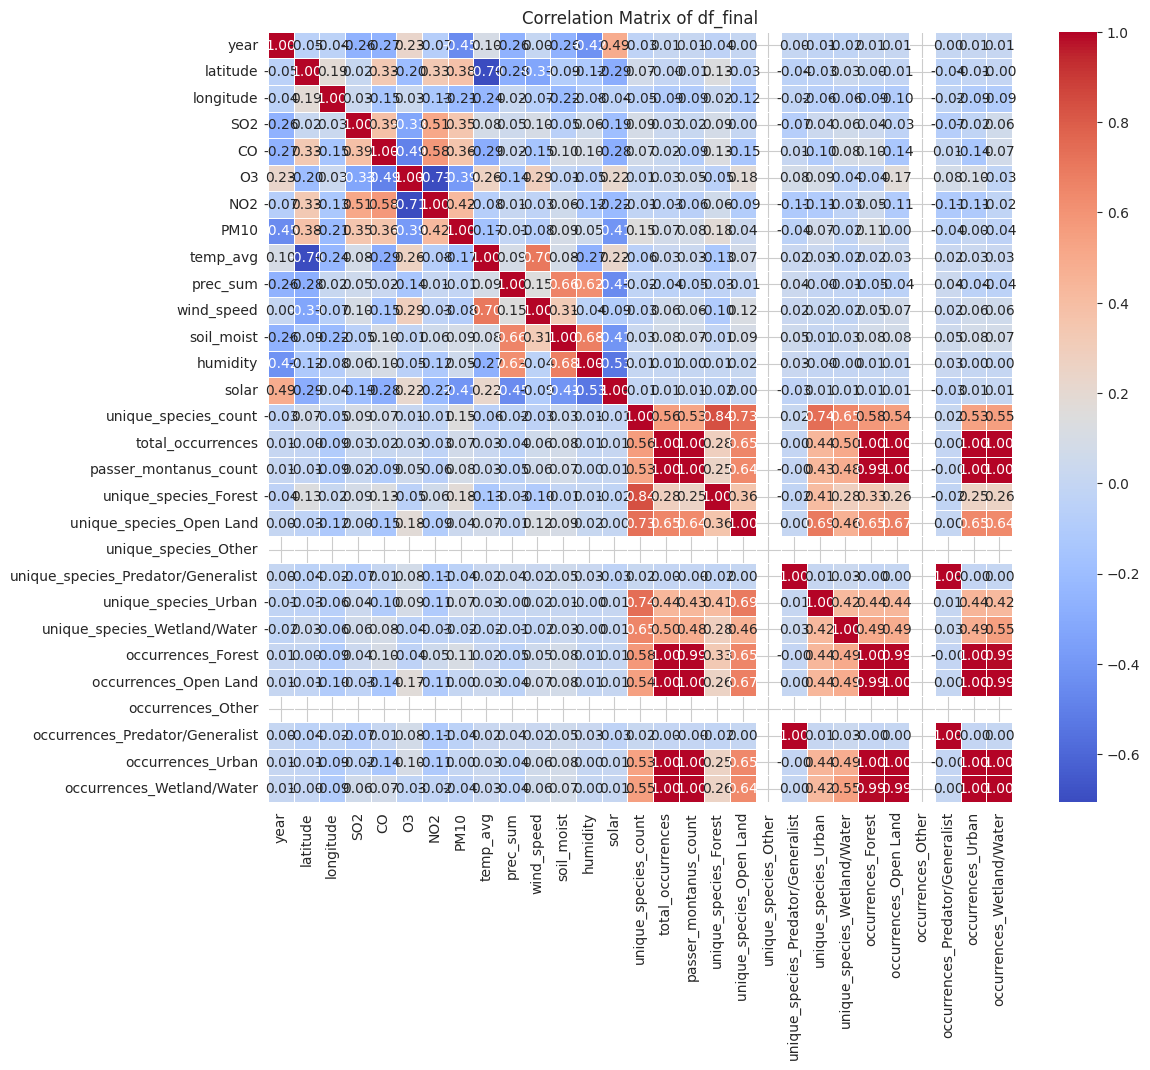

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for df_final
correlation_matrix = df_final.corr(numeric_only=True)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of df_final')
plt.show()

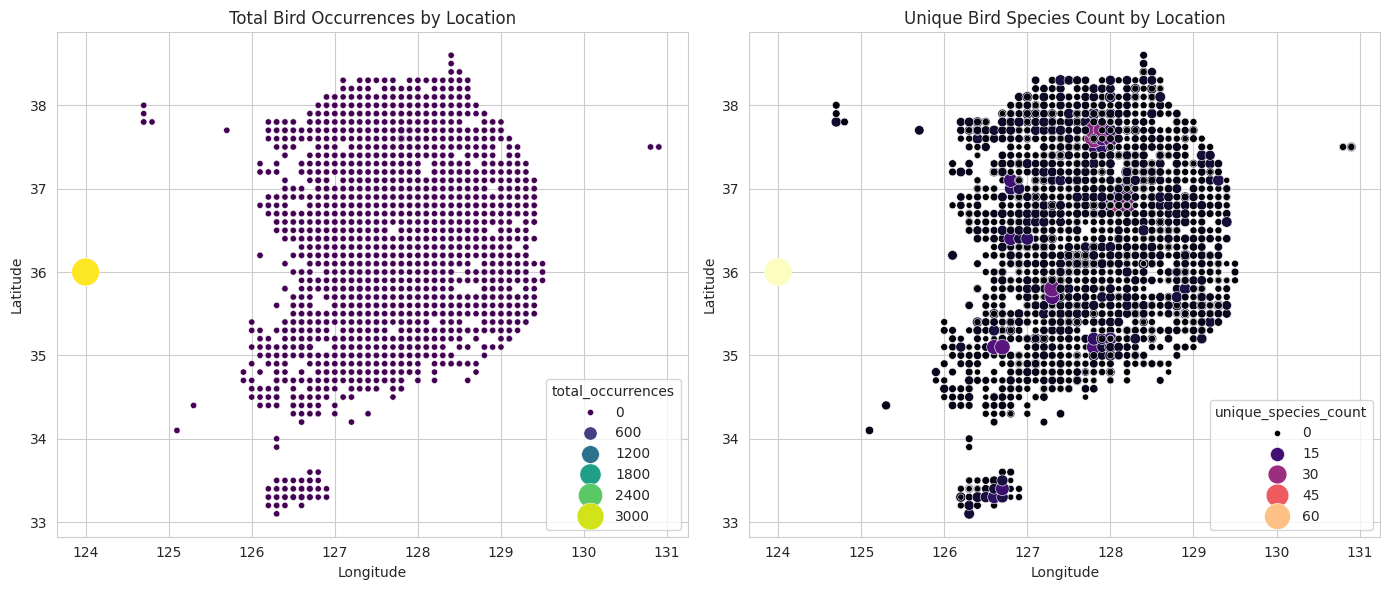

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(14, 6))

# Plot 1: Total Occurrences by Location
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.scatterplot(data=df_final, x='longitude', y='latitude', size='total_occurrences', hue='total_occurrences', sizes=(20, 400), palette='viridis')
plt.title('Total Bird Occurrences by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Plot 2: Unique Species Count by Location
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.scatterplot(data=df_final, x='longitude', y='latitude', size='unique_species_count', hue='unique_species_count', sizes=(20, 400), palette='magma')
plt.title('Unique Bird Species Count by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.tight_layout()
plt.show()

In [79]:
filtered_data = df_final[(df_final['longitude'] == 124) & (df_final['latitude'] == 36)]
print(filtered_data)

      year  latitude  longitude  SO2  CO  O3  NO2  PM10  temp_avg  prec_sum  \
1272  2013      36.0      124.0  NaN NaN NaN  NaN   NaN     13.95      1.92   

      ...  unique_species_Other  unique_species_Predator/Generalist  \
1272  ...                   0.0                                 0.0   

      unique_species_Urban  unique_species_Wetland/Water  occurrences_Forest  \
1272                  11.0                          18.0              1226.0   

      occurrences_Open Land  occurrences_Other  \
1272                  528.0                0.0   

      occurrences_Predator/Generalist  occurrences_Urban  \
1272                              0.0             1000.0   

      occurrences_Wetland/Water  
1272                      467.0  

[1 rows x 29 columns]


In [81]:
df_final = df_final[~((df_final['longitude'] == 124) & (df_final['latitude'] == 36))]

print("df after removing data with longitude 124 and latitude 36:")
print(df_final.head())
print("\ndf info after removal:")
print(df_final.info())

df after removing data with longitude 124 and latitude 36:
   year  latitude  longitude       SO2        CO        O3      NO2  \
0  2001      35.1      126.7       NaN       NaN       NaN      NaN   
1  2001      35.3      126.9       NaN       NaN       NaN      NaN   
2  2001      35.6      126.6       NaN       NaN       NaN      NaN   
3  2001      35.6      127.1       NaN       NaN       NaN      NaN   
4  2001      35.6      127.2  0.003084  0.585592  0.024646  0.00613   

        PM10  temp_avg  prec_sum  ...  unique_species_Other  \
0        NaN     12.17      2.83  ...                   0.0   
1        NaN     11.72      2.61  ...                   0.0   
2        NaN     11.72      2.61  ...                   0.0   
3        NaN     11.72      2.61  ...                   0.0   
4  54.482448     10.50      2.68  ...                   0.0   

   unique_species_Predator/Generalist  unique_species_Urban  \
0                                 0.0                   0.0   
1        

In [89]:
df_final = df_final[~((df_final['total_occurrences'] <= 1) | (df_final['unique_species_count'] <= 0))]

print("df_final after removing rows with low occurrences or species count:")
print(df_final.head())
print("\ndf_final info after removal:")
print(df_final.info())

df_final after removing rows with low occurrences or species count:
   year  latitude  longitude       SO2        CO        O3      NO2  \
1  2001      35.3      126.9       NaN       NaN       NaN      NaN   
4  2001      35.6      127.2  0.003084  0.585592  0.024646  0.00613   
5  2001      35.6      128.8       NaN       NaN       NaN      NaN   
6  2001      35.6      129.0       NaN       NaN       NaN      NaN   
7  2001      35.6      129.1       NaN       NaN       NaN      NaN   

        PM10  temp_avg  prec_sum  ...  unique_species_Other  \
1        NaN     11.72      2.61  ...                   0.0   
4  54.482448     10.50      2.68  ...                   0.0   
5        NaN     11.83      2.73  ...                   0.0   
6        NaN     11.83      2.73  ...                   0.0   
7        NaN     14.42      2.88  ...                   0.0   

   unique_species_Predator/Generalist  unique_species_Urban  \
1                                 0.0                   0.0   


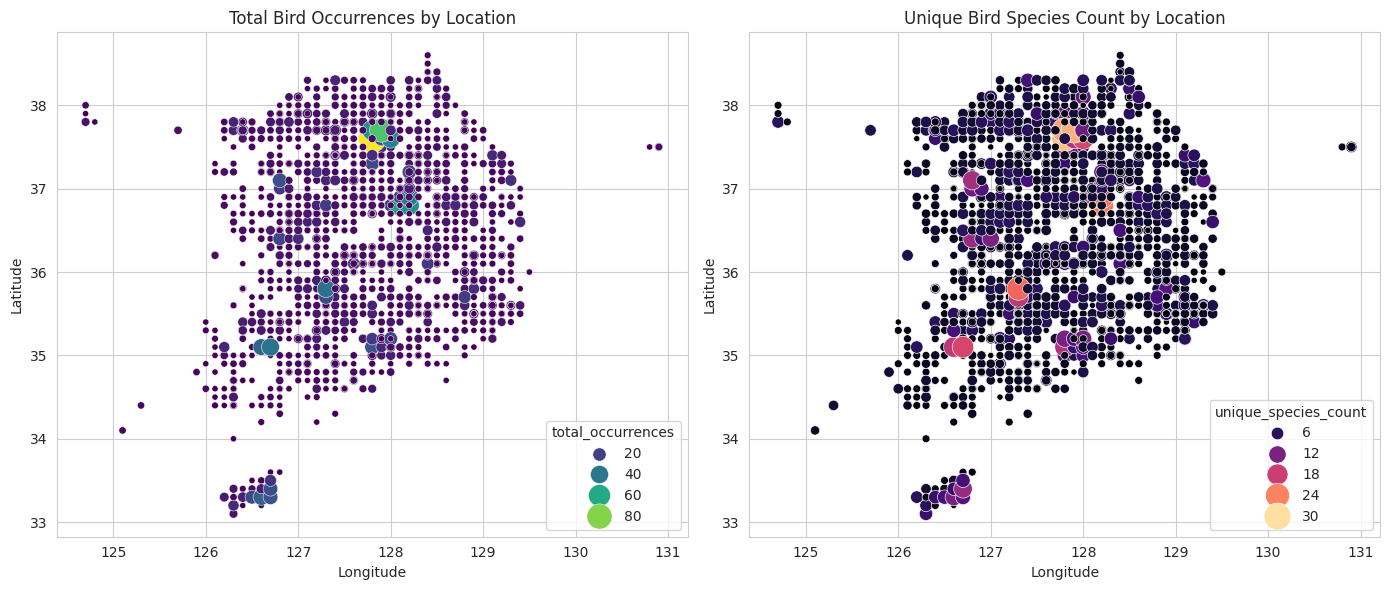

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(14, 6))

# Plot 1: Total Occurrences by Location
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.scatterplot(data=df_final, x='longitude', y='latitude', size='total_occurrences', hue='total_occurrences', sizes=(20, 400), palette='viridis')
plt.title('Total Bird Occurrences by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Plot 2: Unique Species Count by Location
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.scatterplot(data=df_final, x='longitude', y='latitude', size='unique_species_count', hue='unique_species_count', sizes=(20, 400), palette='magma')
plt.title('Unique Bird Species Count by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.tight_layout()
plt.show()

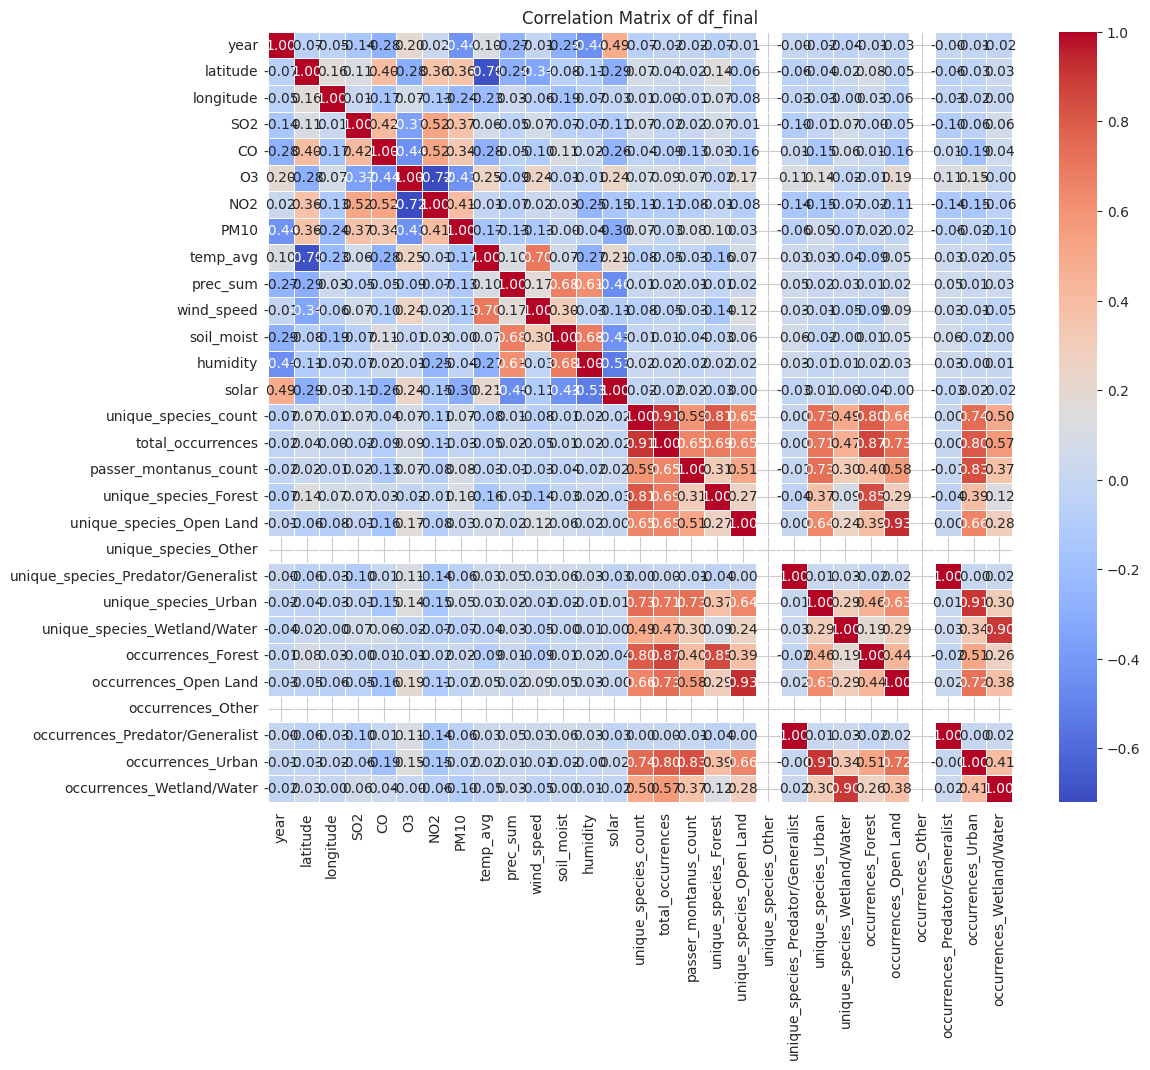

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for df_final
correlation_matrix = df_final.corr(numeric_only=True)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of df_final')
plt.show()

In [92]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1389 entries, 1 to 2052
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                1389 non-null   int64  
 1   latitude                            1389 non-null   float64
 2   longitude                           1389 non-null   float64
 3   SO2                                 158 non-null    float64
 4   CO                                  158 non-null    float64
 5   O3                                  158 non-null    float64
 6   NO2                                 158 non-null    float64
 7   PM10                                158 non-null    float64
 8   temp_avg                            1389 non-null   float64
 9   prec_sum                            1389 non-null   float64
 10  wind_speed                          1389 non-null   float64
 11  soil_moist                          1389 non-nul

#3. 모델 구현
* (사용한 알고리즘)

In [93]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Define independent variables (조작 변인)
independent_vars = [
    'SO2', 'CO', 'O3', 'NO2', 'PM10',
    'temp_avg', 'prec_sum', 'wind_speed', 'soil_moist', 'humidity', 'solar'
]

# Define dependent variables (종속 변인) - all unique_species_... columns
dependent_vars = [
    'unique_species_count', # General unique species count
    'unique_species_Forest',
    'unique_species_Open Land',
    'unique_species_Other',
    'unique_species_Predator/Generalist',
    'unique_species_Urban',
    'unique_species_Wetland/Water'
]

# Create a subset DataFrame with only the relevant columns for regression
df_regress = df_final[independent_vars + dependent_vars].copy()

# Drop rows with any NaN values in the selected columns for a clean regression
df_regress.dropna(inplace=True)

print(f"Original df_final rows: {len(df_final)}")
print(f"Rows after dropping NaNs for regression: {len(df_regress)}\n")

# Prepare the independent variables (X)
X = df_regress[independent_vars]

# Perform multiple linear regression for each dependent variable
for dep_var in dependent_vars:
    print(f"\n--- Regression for Dependent Variable: {dep_var} ---")
    Y = df_regress[dep_var]

    # Check if Y contains only zeros, if so, regression is not meaningful
    if Y.nunique() == 1 and Y.iloc[0] == 0:
        print(f"Skipping regression for {dep_var} as it contains only zero values.")
        continue

    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X, Y)

    # Print the regression results
    print(f"Coefficients: {model.coef_}")
    print(f"Intercept: {model.intercept_}")
    print(f"R-squared: {model.score(X, Y):.4f}")


Original df_final rows: 1389
Rows after dropping NaNs for regression: 158


--- Regression for Dependent Variable: unique_species_count ---
Coefficients: [ 2.06528022e+02 -8.30795509e-02 -1.50921342e+01 -7.59820577e+01
  2.55750485e-02 -7.25372251e-02  3.01466623e-01  3.90628229e-02
  9.75740851e-01 -1.97724536e-01  2.19051322e-01]
Intercept: 16.597098834450623
R-squared: 0.0708

--- Regression for Dependent Variable: unique_species_Forest ---
Coefficients: [ 1.01200546e+02  2.08270594e-01  7.41081192e+00 -2.98331694e+01
  1.08864801e-02 -1.58860652e-02  3.40807729e-01 -2.87173481e-01
 -4.30767111e-01 -1.77611744e-01 -1.47386060e+00]
Intercept: 21.42774497547598
R-squared: 0.0687

--- Regression for Dependent Variable: unique_species_Open Land ---
Coefficients: [-0.04071254 -0.42439758  6.4348183   0.13194094  0.00732179  0.04869183
 -0.12314387  0.06230503 -0.06095661  0.02601006  0.33250983]
Intercept: -3.773260402645721
R-squared: 0.1170

--- Regression for Dependent Variable: uniqu

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import numpy as np

# independent_vars와 dependent_vars는 이미 상단 셀에서 정의되었습니다.
# df_regress는 df_final에서 NaN 값이 제거된 관련 컬럼들로 구성되어 있습니다.

print(f"Rows used for Random Forest regression: {len(df_regress)}\n")

# Prepare the independent variables (X)
X = df_regress[independent_vars]

# Perform Random Forest regression for each dependent variable
for dep_var in dependent_vars:
    print(f"\n--- Random Forest Regression for Dependent Variable: {dep_var} ---")
    Y = df_regress[dep_var]

    # Check if Y contains only zeros, if so, regression is not meaningful
    if Y.nunique() == 1 and Y.iloc[0] == 0:
        print(f"Skipping regression for {dep_var} as it contains only zero values.")
        continue

    # Fit the Random Forest Regressor model
    # Using default parameters for simplicity. Hyperparameter tuning could improve results.
    model = RandomForestRegressor(random_state=42) # random_state for reproducibility
    model.fit(X, Y)

    # Evaluate the model
    y_pred = model.predict(X)
    r_squared = r2_score(Y, y_pred)

    # Print the regression results
    print(f"R-squared: {r_squared:.4f}")

    # Print feature importances
    print("Feature Importances:")
    for feature, importance in zip(X.columns, model.feature_importances_):
        print(f"  {feature}: {importance:.4f}")

Rows used for Random Forest regression: 158


--- Random Forest Regression for Dependent Variable: unique_species_count ---
R-squared: 0.8505
Feature Importances:
  SO2: 0.1095
  CO: 0.1433
  O3: 0.0660
  NO2: 0.0955
  PM10: 0.1043
  temp_avg: 0.1291
  prec_sum: 0.0780
  wind_speed: 0.0688
  soil_moist: 0.0859
  humidity: 0.0743
  solar: 0.0454

--- Random Forest Regression for Dependent Variable: unique_species_Forest ---
R-squared: 0.8456
Feature Importances:
  SO2: 0.1193
  CO: 0.1261
  O3: 0.0987
  NO2: 0.0964
  PM10: 0.1116
  temp_avg: 0.0793
  prec_sum: 0.0654
  wind_speed: 0.0774
  soil_moist: 0.0674
  humidity: 0.0813
  solar: 0.0772

--- Random Forest Regression for Dependent Variable: unique_species_Open Land ---
R-squared: 0.8169
Feature Importances:
  SO2: 0.1667
  CO: 0.1740
  O3: 0.0405
  NO2: 0.0641
  PM10: 0.1676
  temp_avg: 0.1818
  prec_sum: 0.0217
  wind_speed: 0.0313
  soil_moist: 0.0445
  humidity: 0.0645
  solar: 0.0434

--- Random Forest Regression for Dependent 

In [95]:
df_regress.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 4 to 2034
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SO2                                 158 non-null    float64
 1   CO                                  158 non-null    float64
 2   O3                                  158 non-null    float64
 3   NO2                                 158 non-null    float64
 4   PM10                                158 non-null    float64
 5   temp_avg                            158 non-null    float64
 6   prec_sum                            158 non-null    float64
 7   wind_speed                          158 non-null    float64
 8   soil_moist                          158 non-null    float64
 9   humidity                            158 non-null    float64
 10  solar                               158 non-null    float64
 11  unique_species_count                158 non-null 

#4. 모델 평가

#5. 결과 확인 및 해석


#6. 활용 방안 및 기대 효과
* (활용 방안)
* (기대 효과)